#  HACKTIV 8 TALENT FAIR CHALLENGE WITH KALBE

Ojecktive : Melakukan prediksi 14 hari kedepan setiap produk dan kategori dari dataset Kalbe.

# 1. Perkenalan 

Nama    : Ucik Refani Kurnia Sari

TTL     : Surakarta, 09 Agustus 1996

Alamat  : Surakarta / Solo


# 2. Import Libraries 

In [1]:
#Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller

# 3. Loading Data 

In [2]:
#Load Data 
data1 = pd.read_excel('Kalbe A1.xlsx')


In [3]:
#Display the top 5 rows 
data1.head()

,Day,Category,Product,Sales
0,1,A,A1,100.000000
1,2,A,A1,101.000000
2,3,A,A1,102.010000
3,4,A,A1,103.030100
4,5,A,A1,104.060401


In [4]:
#Display the bottom 5 rows 
data1.tail()

,Day,Category,Product,Sales
85,86,A,A1,196.980000
86,87,A,A1,197.964900
87,88,A,A1,198.954724
88,89,A,A1,199.949498
89,90,A,A1,200.949246


In [5]:
#Checking the datatype of each columns
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


- Terdiri dari 4 kolom 90 baris pada setiap kolom. 
- Tidak terdapat missing value. 
- Dataset terdiri dari integer, object dan float.

# 4. Exploratory Data Analysis (EDA)

<AxesSubplot: xlabel='Day', ylabel='Sales'>

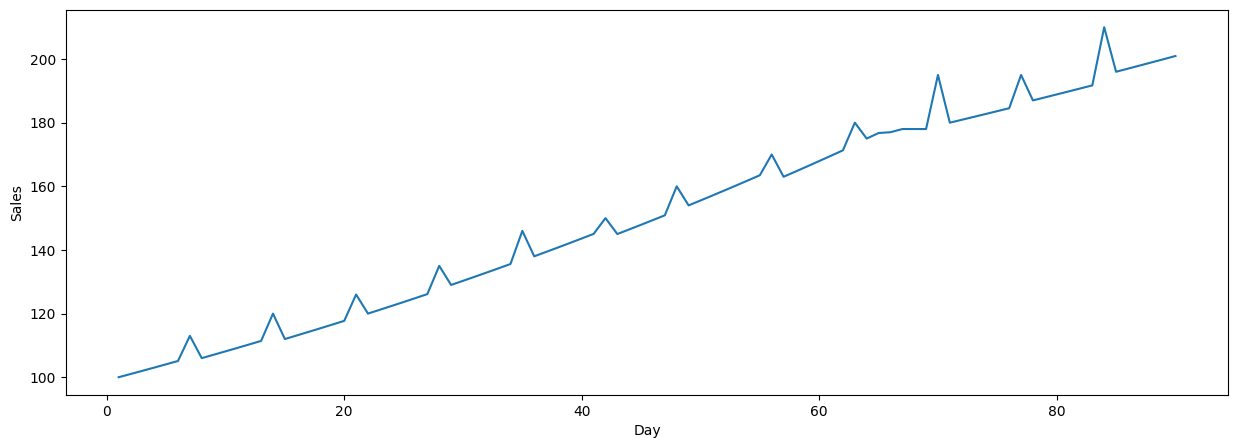

In [6]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data1, x='Day', y='Sales')

Trend menunjukkan bahwa data mengikuti alur ke atas. Penjualan produk A1 yang hari pertama hanya terjual 100 produk mengalami peningkatan setiap harinya hingga 2x lipat yaitu 200 pada hari ke 90. 

## Check data stationary atau tidak dengan menggunakan DICKEY-FULLER 

H0 - Gagal menolak hipotesis nol, artinya data stasioner
H1 - Menolak hipotesis nol, artinya data tidak stationer

Jika nilai p kurang dari nilai threshold yaitu 0.5 gagal menolak hipotesis nol dan berarti data stasioner

Jika nilai p lebih dari nilai threshold 0,5. menolak hipotesis nol menerima hipotesis alternatif artinya data tidak stasioner.

In [7]:
x=data1['Sales']
result=adfuller(x)
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Stataics  0.1602454755282195
p-value 0.969941639515359
critical values 376.22942528346823
Reject the null hypotheise , it mean data is not stationary


Jelas terlihat bahwa nilai p lebih besar dari 0.5, jadi menolak hipotesis nol. sehingga data tidak stasioner. 

# Mengkorversi data non stasioner menjadi stasioner 

In [8]:
data1['Sales difference']=data1['Sales']-data1['Sales'].shift(1)

# Check kembali apakah data stasioner atau tidak 

<AxesSubplot: >

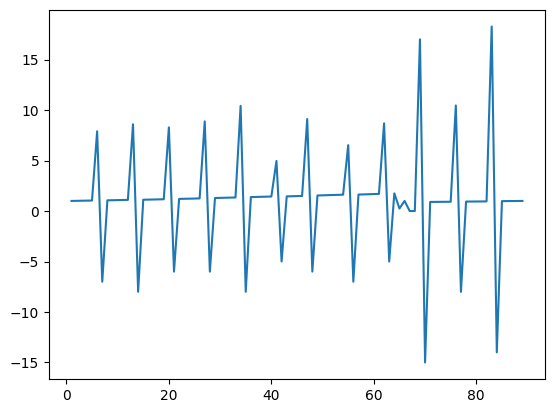

In [9]:
data1['Sales difference'].plot()

Data terlihat sudah stasioner, mean dan standar deviasi tidak berubah seiring dengan bertambahnya waktu. 

In [10]:
x=data1['Sales difference'].dropna() 
result=adfuller(x)
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Stataics  -3.615987938440873
p-value 0.0054626269665863075
critical values 361.25156373581603
fail to reject null hypothese h1 , it mean data is stationary


nilai p kurang dari 0.5, jadi menerima hipotesis nol. artinya data stasioner. 

# Model 

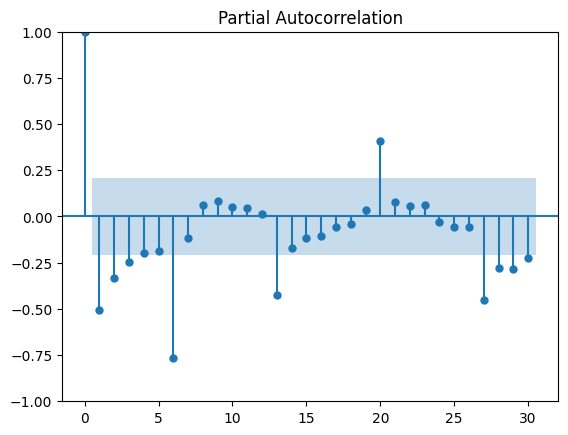

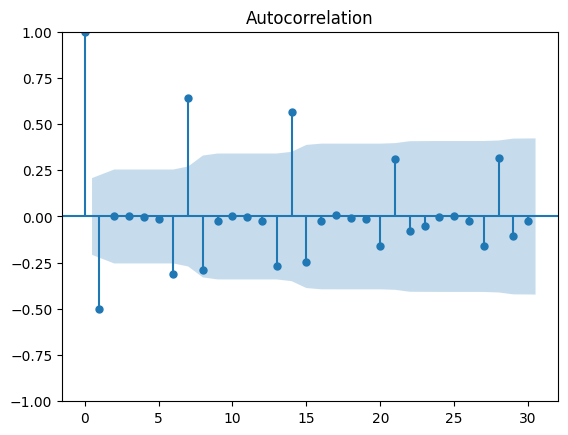

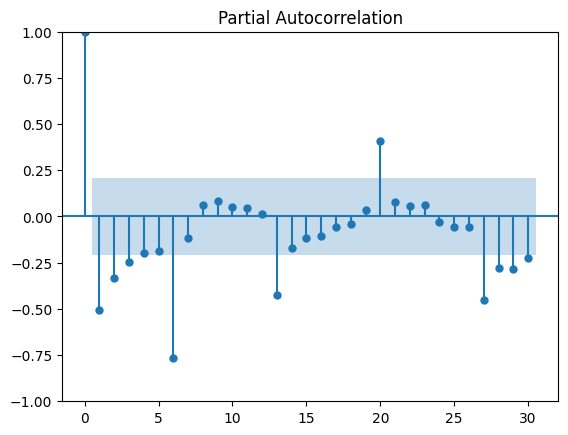

In [11]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data1['Sales difference'].iloc[1:],lags=30)
plot_pacf(data1['Sales difference'].iloc[1:],lags=30)

In [12]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data1['Sales'],order=(2,1,2),seasonal_order=(2,1,2,6))
result=model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92593D+00    |proj g|=  5.64150D-01

At iterate    5    f=  2.64860D+00    |proj g|=  5.77437D-02

At iterate   10    f=  2.61470D+00    |proj g|=  2.62152D-02

At iterate   15    f=  2.60100D+00    |proj g|=  6.66446D-02

At iterate   20    f=  2.59149D+00    |proj g|=  2.28282D-02

At iterate   25    f=  2.58866D+00    |proj g|=  2.38238D-03

At iterate   30    f=  2.58856D+00    |proj g|=  2.71377D-04

At iterate   35    f=  2.58848D+00    |proj g|=  1.81608D-03

At iterate   40    f=  2.58840D+00    |proj g|=  8.50767D-04

At iterate   45    f=  2.58839D+00    |proj g|=  2.78750D-04

At iterate   50    f=  2.58839D+00    |proj g|=  1.60627D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/ucikrefani/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/Users/ucikrefani/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot: >

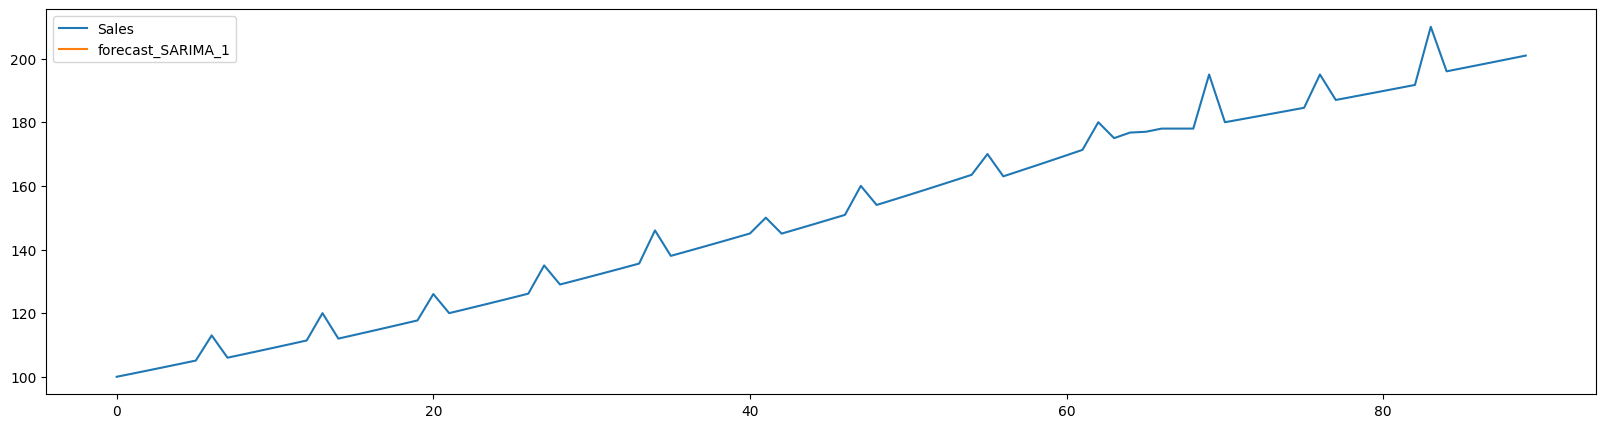

In [13]:
data1['forecast_SARIMA_1']=result.predict(start=91, end=104, dynamic=True)
data1[['Sales','forecast_SARIMA_1']].plot(figsize=(20, 5))